# Analysis for Section 5.1 (ctd.): CST w/o vs CST w/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# src files
from situation_testing.situation_testing import SituationTesting
# plot params
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=11)
plt.rc('legend', fontsize=11)
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('axes', edgecolor='k')
plt.rc('xtick.major', width=2)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', width=2)
plt.rc('ytick.major', size=6)
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

In [2]:
# working directory
wd = os.path.dirname(os.getcwd())
# relevant folders
data_path = os.path.abspath(os.path.join(wd, 'data')) + '\\'
resu_path = os.path.abspath(os.path.join(wd, 'results')) + '\\'

In [3]:
# factual dataset
org_df    = pd.read_csv(data_path + 'LoanApplication_v2.csv', sep='|', )
# counterfactual dataset
org_cf_df = pd.read_csv(data_path + 'counterfactuals\\cf_LoanApplication_v2.csv', sep='|', )

## What's our guess given the current set-up?

Here, let's keep in mind that $\tau=0.0$, meaning any deviation from it by $\Delta p$ is punished by CST as discrimination (under the literal definition). Based on the $k$-results for literal and statistical definitions, my hunch is that CST w/ detects cases with minor deviations under the literal def. that are not statistically significant under the statistical def. -- similar to our CF example.

Importantly, CST w/ uses k+1 neighborhoods (this fact is clear both in the paper and in the code) as it includes the search centers. However, it is important to keep in mind that we do not just add the next neighboor to the $kth$ instance under CST w/ but, in fact, *the most relevant comparison* to each group. It is not surprising that they are impactful, though not in a statistically significant way. This is probably due to the way we generateed the synthetic dataset: clearly unbalanced and biased toward females.

From the two tables below, as well as the two figures, it is clear that the complainants' counterfactuals are "representative" of the males in $\mathcal{D}$. What is interesting is that said dataset is considerably imbalanced. The test-search space is much denser than the control-search space. 

Further, if you look at the summary stats for $k=15$, the ctr and tst groups between w/ and w/o versions are essentially the same. When they coincide, they do so for everything, meaning the search centers do not tilt $\Delta p$ (Set 1). The opposite occurs for Set 2: the $k+1$ tilts enough the $\Delta p$ for CST to pick it up... again, not enough statistically speaking!!! This supports what we find in the previous section. In other words, there's no drastic change in the group compositions but just on the counts of negative decisions, again, a **small enough change in $\Delta p$ for CST to pick it up under the literal definition**. These are likely cases near the border: factual is -1 and its counterfactual 1.  

Naturally, the impact of this $k+1$ is greater for lower $k$. As $k$ increases, we would expect for the impact of the additional comparison (we stress again that being the most important comparison of them all: complainant and counterfactual) to decrease.

Again, these results don't affect the ST vs CST comparison, which is the main experimental concern as it is the CP vs MM comparison, but they further stress the importance of measuring uncertainty and whether it is needed and when and why... Stress in the discussion.

In [4]:
org_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

AnnualSalary                                                            \
              count       mean       std     min      25%       50%       75%   
Gender                                                                          
0            3281.0  100655.29  32509.34     0.0  80000.0  100000.0  120000.0   
1            1712.0   84858.94  31634.45  5000.0  62000.0   83500.0  106500.0   

                 AccountBalance                                         \
             max          count      mean       std      min       25%   
Gender                                                                   
0       270000.0         3281.0  30207.08  10049.34  1851.66  23155.54   
1       201000.0         1712.0  24302.71   9789.64   498.02  17453.30   

                                      
             50%       75%       max  
Gender                                
0       29621.16  36932.95  76890.36  
1       23786.97  30923.07  59268.50

In [5]:
org_cf_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

AnnualSalary                                                      \
              count       mean       std       min       25%        50%   
Gender                                                                    
0            3281.0  100655.29  32509.34     -0.00  80000.00  100000.00   
1            1712.0  100655.29  31634.45  20796.35  77796.35   99296.35   

                             AccountBalance                               \
              75%        max          count      mean       std      min   
Gender                                                                     
0       120000.00  270000.00         3281.0  30207.08  10049.34  1851.66   
1       122296.35  216796.35         1712.0  30207.08   9789.64  6402.39   

                                                
             25%       50%       75%       max  
Gender                                          
0       23155.54  29621.16  36932.95  76890.35  
1       23357.68  29691.34  36827.45  65172.87

Text(0.5, 0, 'Annual salary ($X1$)')

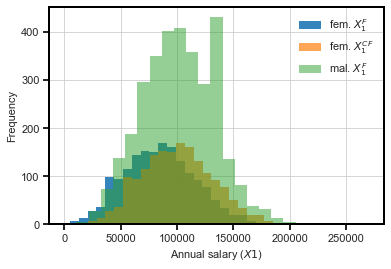

In [6]:
# distributions for X1
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.9, label=r'fem. $X_1^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.7, label=r'fem. $X_1^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AnnualSalary'], bins=b, alpha=0.5, label=r'mal. $X_1^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Annual salary ($X1$)')

Text(0.5, 0, 'Account balance ($X_2$) for females')

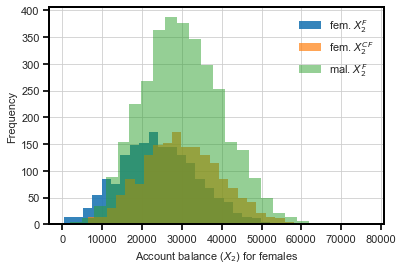

In [7]:
# distributions X2
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.9, label=r'fem. $X_2^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.7, label=r'fem. $X_2^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AccountBalance'], bins=b, alpha=0.5, label=r'mal. $X_2^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Account balance ($X_2$) for females')

## Regarding k=15 results, $\tau=0.0$

In [8]:
res_df = org_df[['Gender', 'LoanApproval']].copy()
res_df['cf_LoanApproval'] = org_cf_df['LoanApproval'].copy()

In [9]:
# ### attribute-specific params
# feat_trgt = 'LoanApproval'
# feat_trgt_vals = {'positive': 1, 'negative': -1}
# # list of relevant features
# feat_rlvt = ['AnnualSalary', 'AccountBalance']
# # protected feature
# feat_prot = 'Gender'
# # values for the protected feature: use 'non_protected' and 'protected' accordingly
# feat_prot_vals = {'non_protected': 0, 'protected': 1}

### st-specific params
# size of neighborhoods
n = 15
# significance level
alpha = 0.05
# tau diviation
tau = 0.0

In [10]:
print("For k=", n)

test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

print("CST w/o")
res_df['CSTwo'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=False, 
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwo'] > tau].shape[0])
# get neighnorhoods
cst_wo_knns = cst.res_dict_df_neighbors
# disc stats
cst_wo_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')].shape[0])

print("CST wi/")
res_df['CSTwi'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=True,
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwi'] > tau].shape[0])
# get neighnorhoods
cst_wi_knns = cst.res_dict_df_neighbors
# disc stats
cst_wi_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')].shape[0])

print("=== DONE ===")

For k= 15
CST w/o
288
272
CST wi/
420
272
=== DONE ===


In [11]:
# Set1: c is in CST w/o and w/
set1 = res_df[(res_df['CSTwo'] > tau) & (res_df['CSTwi'] > tau)].index.to_list()

# check
print('All CST w/o cases in CST w/?')
if res_df[res_df['CSTwo'] > tau].shape[0] == len(set1):
    print('Yes')
else:
    print('No')

# Set2: c is in CST w/ but not in CST w/o
set2 = [c for c in res_df[(res_df['CSTwi'] > tau)].index.to_list() if c not in set1]
print(len(set2), "are only in CST w/")

# check
print((len(set1) + len(set2)) == res_df[res_df['CSTwi'] > tau].shape[0])

All CST w/o cases in CST w/?
Yes
132 are only in CST w/
True


In [12]:
# c's in CST w/o and w/ THAT ARE STATISTICALLY SIGNIFICANT
temp_s1 = cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s2 = cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s3 = [c for c in temp_s1 if c in temp_s2]
# Are these the same for both CST versions?
print(len(temp_s1) == len(temp_s3))

True


In [16]:
# Summary stats for c's in both CST w/ and w/o (i.e., set1): let's look at both versions

print("For k=", n)

nsf = 2
list_temp_df = []
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

for c in set1:
    
    temp_df = {}
    
    temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
    temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
    temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
    temp_ctr_wi = temp_ctr_wi.append(org_df.loc[c, var])
    print(org_df.loc[c, var])
    temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
    temp_tst_wi = temp_tst_wi.append(org_cf_df.loc[c, var])
    print(org_cf_df.loc[c, var])
        
    temp_df['id'] = c
    # num. of negative decisions
    temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
    # prp. of negative decisions
    temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
    temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
    temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / (n + 1), nsf)
    temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / (n + 1), nsf)
            
#     temp_df['avg_d_ctr']    = round(sum(stST_dis[c]['ctr_idx']) / len(stST_dis[c]['ctr_idx']), nsf)
#     temp_df['avg_d_tst_st'] = round(sum(stST_dis[c]['tst_idx']) / len(stST_dis[c]['tst_idx']), nsf)
#     temp_df['avg_d_tst_cf'] = round(sum(cfST_dis[c]['tst_idx']) / len(cfST_dis[c]['tst_idx']), nsf)
    
    for v in ['AnnualSalary', 'AccountBalance']:
        temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
        temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
        temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
        temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
        temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
        temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
        temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
        temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
    list_temp_df.append(temp_df)

set1_summary_stats = pd.DataFrame(list_temp_df)

# set1_summary_stats.head(5)

For k= 15
AnnualSalary      102000.000000
AccountBalance     26000.811689
LoanApproval           1.000000
Name: 5, dtype: float64
AnnualSalary      117796.35
AccountBalance     31905.19
LoanApproval           1.00
Name: 5, dtype: float64
AnnualSalary      84500.000000
AccountBalance    21275.931413
LoanApproval         -1.000000
Name: 9, dtype: float64
AnnualSalary      100296.35
AccountBalance     27180.30
LoanApproval           1.00
Name: 9, dtype: float64
AnnualSalary      89000.000000
AccountBalance    26082.400989
LoanApproval         -1.000000
Name: 44, dtype: float64
AnnualSalary      104796.35
AccountBalance     31986.77
LoanApproval           1.00
Name: 44, dtype: float64
AnnualSalary      89500.000000
AccountBalance    23299.049595
LoanApproval         -1.000000
Name: 50, dtype: float64
AnnualSalary      105296.35
AccountBalance     29203.42
LoanApproval           1.00
Name: 50, dtype: float64
AnnualSalary      93500.000000
AccountBalance    25735.871748
LoanApproval         

AnnualSalary      76500.000000
AccountBalance    25385.115087
LoanApproval         -1.000000
Name: 522, dtype: float64
AnnualSalary      92296.35
AccountBalance    31289.48
LoanApproval          1.00
Name: 522, dtype: float64
AnnualSalary      86500.000000
AccountBalance    23216.730896
LoanApproval         -1.000000
Name: 558, dtype: float64
AnnualSalary      102296.35
AccountBalance     29121.11
LoanApproval           1.00
Name: 558, dtype: float64
AnnualSalary      84000.000000
AccountBalance    24810.240748
LoanApproval         -1.000000
Name: 584, dtype: float64
AnnualSalary      99796.35
AccountBalance    30714.61
LoanApproval          1.00
Name: 584, dtype: float64
AnnualSalary      81000.000000
AccountBalance    23564.927548
LoanApproval         -1.000000
Name: 586, dtype: float64
AnnualSalary      96796.35
AccountBalance    29469.30
LoanApproval          1.00
Name: 586, dtype: float64
AnnualSalary      84000.000000
AccountBalance    26096.039037
LoanApproval         -1.000000


AnnualSalary      110796.35
AccountBalance     28938.82
LoanApproval           1.00
Name: 1368, dtype: float64
AnnualSalary      92000.000000
AccountBalance    22310.424961
LoanApproval         -1.000000
Name: 1373, dtype: float64
AnnualSalary      107796.35
AccountBalance     28214.79
LoanApproval           1.00
Name: 1373, dtype: float64
AnnualSalary      85000.000000
AccountBalance    26413.016913
LoanApproval         -1.000000
Name: 1385, dtype: float64
AnnualSalary      100796.35
AccountBalance     32317.38
LoanApproval           1.00
Name: 1385, dtype: float64
AnnualSalary      81000.000000
AccountBalance    25472.245043
LoanApproval         -1.000000
Name: 1388, dtype: float64
AnnualSalary      96796.35
AccountBalance    31376.62
LoanApproval          1.00
Name: 1388, dtype: float64
AnnualSalary      109500.000000
AccountBalance     25003.261806
LoanApproval           1.000000
Name: 1399, dtype: float64
AnnualSalary      125296.35
AccountBalance     30907.64
LoanApproval        

AnnualSalary      85000.00000
AccountBalance    23503.39862
LoanApproval         -1.00000
Name: 2293, dtype: float64
AnnualSalary      100796.35
AccountBalance     29407.77
LoanApproval           1.00
Name: 2293, dtype: float64
AnnualSalary      88000.000000
AccountBalance    21158.608337
LoanApproval         -1.000000
Name: 2295, dtype: float64
AnnualSalary      103796.35
AccountBalance     27062.98
LoanApproval           1.00
Name: 2295, dtype: float64
AnnualSalary      90500.000000
AccountBalance    25063.788033
LoanApproval         -1.000000
Name: 2297, dtype: float64
AnnualSalary      106296.35
AccountBalance     30968.16
LoanApproval           1.00
Name: 2297, dtype: float64
AnnualSalary      89500.000000
AccountBalance    23037.717514
LoanApproval         -1.000000
Name: 2315, dtype: float64
AnnualSalary      105296.35
AccountBalance     28942.09
LoanApproval           1.00
Name: 2315, dtype: float64
AnnualSalary      96500.000000
AccountBalance    22533.436235
LoanApproval     

AnnualSalary      88000.000000
AccountBalance    25728.578188
LoanApproval         -1.000000
Name: 3039, dtype: float64
AnnualSalary      103796.35
AccountBalance     31632.95
LoanApproval           1.00
Name: 3039, dtype: float64
AnnualSalary      104500.00000
AccountBalance     23671.40255
LoanApproval          -1.00000
Name: 3065, dtype: float64
AnnualSalary      120296.35
AccountBalance     29575.78
LoanApproval           1.00
Name: 3065, dtype: float64
AnnualSalary      85000.000000
AccountBalance    28923.541022
LoanApproval          1.000000
Name: 3071, dtype: float64
AnnualSalary      100796.35
AccountBalance     34827.91
LoanApproval           1.00
Name: 3071, dtype: float64
AnnualSalary      85000.000000
AccountBalance    22043.862466
LoanApproval         -1.000000
Name: 3075, dtype: float64
AnnualSalary      100796.35
AccountBalance     27948.23
LoanApproval           1.00
Name: 3075, dtype: float64
AnnualSalary      91000.000000
AccountBalance    21842.824935
LoanApproval  

AnnualSalary      86500.000000
AccountBalance    27315.107603
LoanApproval         -1.000000
Name: 3653, dtype: float64
AnnualSalary      102296.35
AccountBalance     33219.48
LoanApproval           1.00
Name: 3653, dtype: float64
AnnualSalary      88000.000000
AccountBalance    26247.587315
LoanApproval         -1.000000
Name: 3656, dtype: float64
AnnualSalary      103796.35
AccountBalance     32151.96
LoanApproval           1.00
Name: 3656, dtype: float64
AnnualSalary      96500.000000
AccountBalance    25065.774189
LoanApproval         -1.000000
Name: 3688, dtype: float64
AnnualSalary      112296.35
AccountBalance     30970.15
LoanApproval           1.00
Name: 3688, dtype: float64
AnnualSalary      85000.000000
AccountBalance    26099.069093
LoanApproval         -1.000000
Name: 3693, dtype: float64
AnnualSalary      100796.35
AccountBalance     32003.44
LoanApproval           1.00
Name: 3693, dtype: float64
AnnualSalary      90500.000000
AccountBalance    21615.817073
LoanApproval  

AnnualSalary      89500.000000
AccountBalance    24089.444978
LoanApproval         -1.000000
Name: 4315, dtype: float64
AnnualSalary      105296.35
AccountBalance     29993.82
LoanApproval           1.00
Name: 4315, dtype: float64
AnnualSalary      95000.000000
AccountBalance    26726.688714
LoanApproval          1.000000
Name: 4334, dtype: float64
AnnualSalary      110796.35
AccountBalance     32631.06
LoanApproval           1.00
Name: 4334, dtype: float64
AnnualSalary      85000.000000
AccountBalance    26082.727592
LoanApproval         -1.000000
Name: 4338, dtype: float64
AnnualSalary      100796.35
AccountBalance     31987.10
LoanApproval           1.00
Name: 4338, dtype: float64
AnnualSalary      88000.000000
AccountBalance    22250.961186
LoanApproval         -1.000000
Name: 4346, dtype: float64
AnnualSalary      103796.35
AccountBalance     28155.34
LoanApproval           1.00
Name: 4346, dtype: float64
AnnualSalary      85000.000000
AccountBalance    26125.316912
LoanApproval  

AnnualSalary      86500.000000
AccountBalance    27058.698253
LoanApproval         -1.000000
Name: 4862, dtype: float64
AnnualSalary      102296.35
AccountBalance     32963.07
LoanApproval           1.00
Name: 4862, dtype: float64
AnnualSalary      101000.000000
AccountBalance     23956.112325
LoanApproval          -1.000000
Name: 4880, dtype: float64
AnnualSalary      116796.35
AccountBalance     29860.49
LoanApproval           1.00
Name: 4880, dtype: float64
AnnualSalary      87500.000000
AccountBalance    24553.374349
LoanApproval         -1.000000
Name: 4904, dtype: float64
AnnualSalary      103296.35
AccountBalance     30457.75
LoanApproval           1.00
Name: 4904, dtype: float64
AnnualSalary      87500.000000
AccountBalance    27576.614941
LoanApproval          1.000000
Name: 4907, dtype: float64
AnnualSalary      103296.35
AccountBalance     33480.99
LoanApproval           1.00
Name: 4907, dtype: float64
AnnualSalary      68000.000000
AccountBalance    25245.090143
LoanApprova

In [14]:
set1_summary_stats.mean().round(2)

id                            2528.21
neg_y_ctr_wo                    12.80
neg_y_tst_wo                     0.63
neg_y_ctr_wi                    13.65
neg_y_tst_wi                     0.63
p_ctr_wo                         0.85
p_tst_wo                         0.04
p_ctr_wi                         0.85
p_tst_wi                         0.04
avg_ctr_wo_AnnualSalary      87867.82
std_ctr_wo_AnnualSalary       1547.62
avg_tst_wo_AnnualSalary      98745.37
std_tst_wo_AnnualSalary        371.41
avg_ctr_wi_AnnualSalary      87871.20
std_ctr_wi_AnnualSalary       1505.47
avg_tst_wi_AnnualSalary      99056.17
std_tst_wi_AnnualSalary       1503.51
avg_ctr_wo_AccountBalance    24993.61
std_ctr_wo_AccountBalance      496.69
avg_tst_wo_AccountBalance    28956.73
std_tst_wo_AccountBalance      191.06
avg_ctr_wi_AccountBalance    24994.22
std_ctr_wi_AccountBalance      483.43
avg_tst_wi_AccountBalance    29078.66
std_tst_wi_AccountBalance      549.23
dtype: float64

In [17]:
# Summary stats for c's in only CST w/ (i.e., set2): let's look at both versions

print("For k=", n)

nsf = 2
list_temp_df = []
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

for c in set2:
    
    temp_df = {}
    
    temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
    temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
    temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
    temp_ctr_wi = temp_ctr_wi.append(org_df.loc[c, var])
    print(org_df.loc[c, var])
    temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
    temp_tst_wi = temp_tst_wi.append(org_cf_df.loc[c, var])
    print(org_cf_df.loc[c, var])
        
    temp_df['id'] = c
    # num. of negative decisions
    temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
    # prp. of negative decisions
    temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
    temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
    temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / (n + 1), nsf)
    temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / (n + 1), nsf)
            
#     temp_df['avg_d_ctr']    = round(sum(stST_dis[c]['ctr_idx']) / len(stST_dis[c]['ctr_idx']), nsf)
#     temp_df['avg_d_tst_st'] = round(sum(stST_dis[c]['tst_idx']) / len(stST_dis[c]['tst_idx']), nsf)
#     temp_df['avg_d_tst_cf'] = round(sum(cfST_dis[c]['tst_idx']) / len(cfST_dis[c]['tst_idx']), nsf)
    
    for v in ['AnnualSalary', 'AccountBalance']:
        temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
        temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
        temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
        temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
        temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
        temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
        temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
        temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
    list_temp_df.append(temp_df)

set2_summary_stats = pd.DataFrame(list_temp_df)

# set2_summary_stats.head(5)

For k= 15
AnnualSalary      76500.000000
AccountBalance    21357.751889
LoanApproval         -1.000000
Name: 47, dtype: float64
AnnualSalary      92296.35
AccountBalance    27262.12
LoanApproval          1.00
Name: 47, dtype: float64
AnnualSalary      78000.000000
AccountBalance    21309.224209
LoanApproval         -1.000000
Name: 150, dtype: float64
AnnualSalary      93796.35
AccountBalance    27213.60
LoanApproval          1.00
Name: 150, dtype: float64
AnnualSalary      80500.000000
AccountBalance    21509.588726
LoanApproval         -1.000000
Name: 169, dtype: float64
AnnualSalary      96296.35
AccountBalance    27413.96
LoanApproval          1.00
Name: 169, dtype: float64
AnnualSalary      80500.000000
AccountBalance    20636.349443
LoanApproval         -1.000000
Name: 177, dtype: float64
AnnualSalary      96296.35
AccountBalance    26540.72
LoanApproval          1.00
Name: 177, dtype: float64
AnnualSalary      82000.000000
AccountBalance    22193.585085
LoanApproval         -1.00

AnnualSalary      82000.000000
AccountBalance    22850.009408
LoanApproval         -1.000000
Name: 1419, dtype: float64
AnnualSalary      97796.35
AccountBalance    28754.38
LoanApproval          1.00
Name: 1419, dtype: float64
AnnualSalary      79500.000000
AccountBalance    22858.485878
LoanApproval         -1.000000
Name: 1442, dtype: float64
AnnualSalary      95296.35
AccountBalance    28762.86
LoanApproval          1.00
Name: 1442, dtype: float64
AnnualSalary      84000.000000
AccountBalance    23061.170597
LoanApproval         -1.000000
Name: 1495, dtype: float64
AnnualSalary      99796.35
AccountBalance    28965.54
LoanApproval          1.00
Name: 1495, dtype: float64
AnnualSalary      70500.000000
AccountBalance    22080.107255
LoanApproval         -1.000000
Name: 1499, dtype: float64
AnnualSalary      86296.35
AccountBalance    27984.48
LoanApproval          1.00
Name: 1499, dtype: float64
AnnualSalary      75000.000000
AccountBalance    22129.246041
LoanApproval         -1.00

AnnualSalary      79000.000000
AccountBalance    20245.054396
LoanApproval         -1.000000
Name: 2759, dtype: float64
AnnualSalary      94796.35
AccountBalance    26149.43
LoanApproval          1.00
Name: 2759, dtype: float64
AnnualSalary      76000.000000
AccountBalance    21926.260183
LoanApproval         -1.000000
Name: 2769, dtype: float64
AnnualSalary      91796.35
AccountBalance    27830.63
LoanApproval          1.00
Name: 2769, dtype: float64
AnnualSalary      78000.000000
AccountBalance    21968.047134
LoanApproval         -1.000000
Name: 2787, dtype: float64
AnnualSalary      93796.35
AccountBalance    27872.42
LoanApproval          1.00
Name: 2787, dtype: float64
AnnualSalary      78000.000000
AccountBalance    22507.266262
LoanApproval         -1.000000
Name: 2848, dtype: float64
AnnualSalary      93796.35
AccountBalance    28411.64
LoanApproval          1.00
Name: 2848, dtype: float64
AnnualSalary      74000.00000
AccountBalance    24660.89056
LoanApproval         -1.0000

Name: 4149, dtype: float64
AnnualSalary      97796.35
AccountBalance    28145.10
LoanApproval          1.00
Name: 4149, dtype: float64
AnnualSalary      76500.000000
AccountBalance    21912.329329
LoanApproval         -1.000000
Name: 4231, dtype: float64
AnnualSalary      92296.35
AccountBalance    27816.70
LoanApproval          1.00
Name: 4231, dtype: float64
AnnualSalary      69000.000000
AccountBalance    22591.295068
LoanApproval         -1.000000
Name: 4234, dtype: float64
AnnualSalary      84796.35
AccountBalance    28495.66
LoanApproval          1.00
Name: 4234, dtype: float64
AnnualSalary      77500.000000
AccountBalance    22690.754523
LoanApproval         -1.000000
Name: 4297, dtype: float64
AnnualSalary      93296.35
AccountBalance    28595.12
LoanApproval          1.00
Name: 4297, dtype: float64
AnnualSalary      75000.000000
AccountBalance    22198.760304
LoanApproval         -1.000000
Name: 4298, dtype: float64
AnnualSalary      90796.35
AccountBalance    28103.13
LoanApp

In [18]:
set2_summary_stats.mean().round(2)

id                            2383.83
neg_y_ctr_wo                    15.00
neg_y_tst_wo                    15.00
neg_y_ctr_wi                    16.00
neg_y_tst_wi                    15.00
p_ctr_wo                         1.00
p_tst_wo                         1.00
p_ctr_wi                         1.00
p_tst_wi                         0.94
avg_ctr_wo_AnnualSalary      76471.97
std_ctr_wo_AnnualSalary       1301.68
avg_tst_wo_AnnualSalary      87080.81
std_tst_wo_AnnualSalary        489.98
avg_ctr_wi_AnnualSalary      76470.41
std_ctr_wi_AnnualSalary       1265.22
avg_tst_wi_AnnualSalary      87403.46
std_tst_wi_AnnualSalary       1653.75
avg_ctr_wo_AccountBalance    22088.48
std_ctr_wo_AccountBalance      408.55
avg_tst_wo_AccountBalance    25891.52
std_tst_wo_AccountBalance      124.86
avg_ctr_wi_AccountBalance    22089.75
std_ctr_wi_AccountBalance      396.50
avg_tst_wi_AccountBalance    26024.13
std_tst_wi_AccountBalance      550.77
dtype: float64

## The impact of $|k|$, given $\tau$

## The impact of $|\tau|$, given $K$